In [1]:
import numpy as np
import pandas, sklearn

In [2]:
song_data = pandas.read_csv('song_data.csv')

In [3]:
song_data.head()

,user_id,song_id,listen_count,title,artist,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

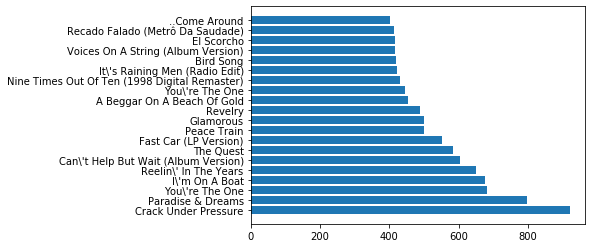

In [5]:

best_songs = song_data.sort_values('listen_count', ascending=False).head(20)
counter_labels = best_songs['title']
counts = best_songs['listen_count']
counter_pos = np.arange(20)
plt.barh(counter_pos, counts)
plt.yticks(counter_pos,  counter_labels)
plt.show()

In [6]:
len(song_data)

1116609

In [7]:
len(song_data['user_id'].unique())

66346

In [8]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(song_data, train_size=0.8, test_size=0.2, random_state=0)
print(len(train_data), len(test_data))

893287 223322


## Simple popularity-based recommender 

In [9]:
popularity = song_data.groupby('song')['listen_count'].sum().to_frame('total_listen_count').sort_values('total_listen_count', ascending=False)
popularity.head(10)


,total_listen_count
song,
You\'re The One - Dwight Yoakam,40619
Undo - Björk,36059
Revelry - Kings Of Leon,30391
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner,21953
Sehr kosmisch - Harmonia,21646
Dog Days Are Over (Radio Edit) - Florence + The Machine,15889
Secrets - OneRepublic,14149
Ain\'t Misbehavin - Sam Cooke,14029
Invalid - Tub Ring,13701


## Build a song recommender with personalization

In [10]:
song_data_grouped = song_data.groupby('song')['user_id'].agg(lambda val: ' '.join(val.values))
from sklearn.feature_extraction.text import CountVectorizer
values = CountVectorizer(max_features=1000).fit_transform(song_data_grouped.values)
dense_values = values.todense()
print('dense value', dense_values.shape)
# Calculate songs similarity using jaccard
from scipy.spatial.distance import cdist
similarity = cdist(dense_values, dense_values, 'jaccard')
print('similarity', similarity.shape)
#print(similarity)

dense value (9952, 1000)
similarity (9952, 9952)


In [14]:
random_song = 2010
print('Random song name: {:s}'.format(song_data_grouped.index[random_song]))
def retrieve_similar_items(song_id, values_kept=20):
    return np.argsort(similarity[song_id])[1:values_kept+1]
similar_10 = retrieve_similar_items(random_song, 10)
print("List of 10 similar songs: \n{}".format('\n'.join((song_data_grouped.index[similar_10]))))

Random song name: Disco Heaven - Lady GaGa
List of 10 similar songs: 
Hope For The Hopeless - A Fine Frenzy
The Medallion Calls - Klaus Badelt
They Do_ They Don\'t - Jack Johnson
Anything But Ordinary - Avril Lavigne
City Of The Dead - The Clash
FANTASY - Mariah Carey
That\'s How You Like It - Beyoncé feat. Jay-Z
Ain\'t Talkin\'  \'Bout Love (Remastered Version) - Van Halen
Amsterdam - Coldplay
Mediocre Bad Guys - Jack Johnson
